In [1]:
#set the Path Directory
import os
os.chdir('C:\Users\Arun\Desktop\Projects')

In [45]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Data scaling and splits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Learners
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn import linear_model
from sklearn import tree,preprocessing

# Feature selection and dimensionality reduction
from sklearn.decomposition import FastICA, PCA
from sklearn import random_projection

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.feature_selection import SelectFromModel

from scipy.stats import kurtosis, skew

import itertools

from IPython.display import Image

import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Reading data
#remove non-predictive variables
data=pd.read_csv('student-mat.csv', sep = ";")
print(data.shape)

data.drop(['G1','G2'], axis=1, inplace=True)
data.shape

print(data.dtypes)

(395, 33)
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G3             int64
dtype: object


In [7]:
#getting dummies
data= pd.get_dummies(data=data, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

In [8]:
#identifying categorical and numerical variables
#Grades variables will be the numerical variable
numerical_var=['age','absences']

data_vars=data.columns.values.tolist()
categorical_var=[i for i in data_vars if i not in numerical_var]
categorical_var=categorical_var[1:len(categorical_var)-1]

In [9]:
#normalizing the numerical variables
data_numerical=data[numerical_var]
scaler = preprocessing.StandardScaler()
scaler.fit(data_numerical)  
data_numerical_scaled = pd.DataFrame(scaler.transform(data_numerical))
data_numerical_scaled.columns=data_numerical.columns
data_catergorical = data[categorical_var]
data_catergorical=data_catergorical.astype(object)
data2 = pd.concat([data_numerical_scaled,data_catergorical,data['G3']], axis=1)

('mean : ', 10.415189873417722)
('median:', 11.0)
('var  : ', 20.93647812850505)
('skew : ', -0.7298871128420806)
('kurt : ', 0.3831807721034517)


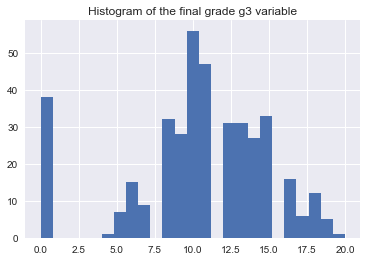

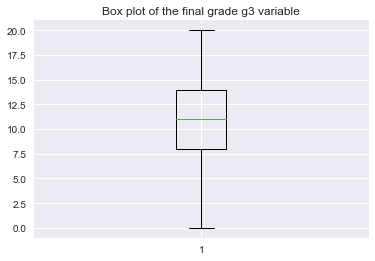

In [10]:
#checking for skewness and kurtosis of the outcome variable (g3)
print("mean : ", np.mean(data['G3']))
print("median:", np.median(data['G3']))
print("var  : ", np.var(data['G3']))
print("skew : ",skew(data['G3']))
print("kurt : ",kurtosis(data['G3']))

pl.hist(data['G3'],bins=25)
pl.title('Histogram of the final grade g3 variable')
pl.show()

pl.boxplot(data['G3'])
pl.title('Box plot of the final grade g3 variable')
pl.show()

In [11]:
#splitting two grade levels on mean value which is 10
data2['G3'] = np.where(data2['G3'] >= 10, 1, 0)

In [12]:
data3=pd.concat([data_numerical_scaled,data_catergorical,data2['G3']], axis=1)

In [13]:
Y_lo=data3['G3']
X_lo=data3.drop(['G3'], axis=1)

In [14]:
#Converting data frame into arrays
X_lo = X_lo.values
X_lo

array([[1.023046454461126, 0.03642446420844665, 1, ..., 0, 1, 0],
       [0.23837975637929248, -0.21379576818001317, 1, ..., 0, 1, 0],
       [-1.3309536397843746, 0.5368649289853663, 1, ..., 0, 1, 0],
       ..., 
       [3.377046548706627, -0.33890588437424307, 0, ..., 0, 1, 0],
       [1.023046454461126, -0.7142362329569328, 0, ..., 0, 0, 0],
       [1.8077131525429595, -0.08868565198578325, 0, ..., 0, 0, 0]], dtype=object)

In [15]:
#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(X_lo,Y_lo,test_size=0.3, random_state = 5040)

In [16]:
y_train = np.array(y_train).flatten()                                    #For linear regression
y_test = np.array(y_test).flatten()                                      #For linear regression

ValueError: could not convert string to float: linear

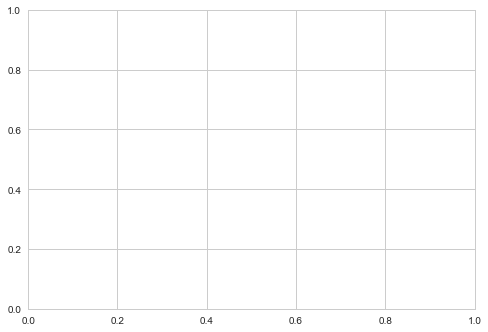

In [20]:
#Support Vector Machine

from sklearn.svm import SVC
kernel = ['linear', 'poly', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = svm.SVC(kernel = kernel[i], random_state = 111)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

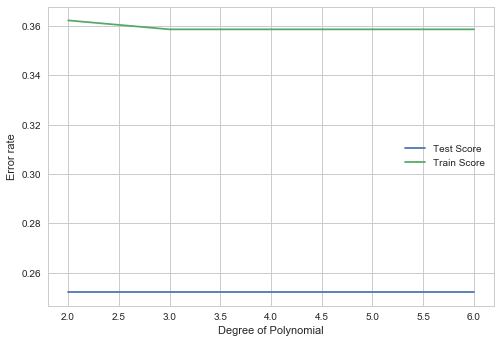

In [21]:
degr = [2, 3, 4, 5, 6]
error_test = []
error_train = []

for i in range(0, len(degr)):
    clf_svc = svm.SVC(kernel='poly', degree = degr[i], random_state = 111)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))

sns.set(style="whitegrid")


plt.plot(degr, error_test)
plt.plot(degr, error_train)

plt.xlabel('Degree of Polynomial')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

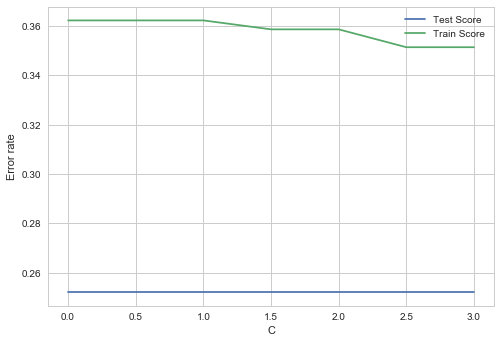

In [22]:
c = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]
error_test = []
error_train = []

for i in range(0, len(c)):
    clf_svc = svm.SVC(kernel='poly', degree = 2, C = c[i], random_state = 111)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))

sns.set(style="whitegrid")


plt.plot(c, error_test)
plt.plot(c, error_train)

plt.xlabel('C')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [23]:
# Traing SVC
clf_svc = svm.SVC(kernel='poly', degree = 2, C = 2.5, random_state = 111)
clf_svc.fit(X_train, y_train)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=111, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[ 0 30]
 [ 0 89]]
Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]


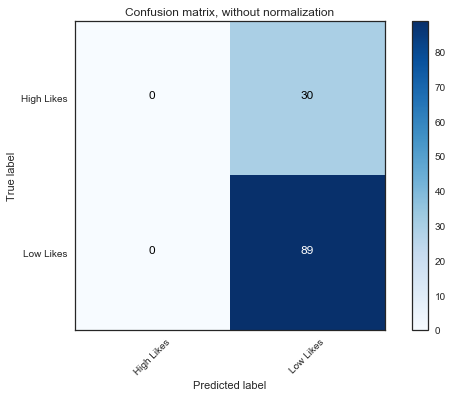

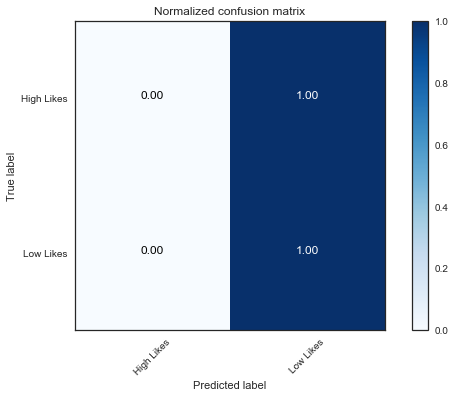

In [24]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = clf_svc.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, clf_svc.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, clf_svc.predict(X_test)), 2)))

f1 score for training dataset is 0.78
f1 score for testing dataset is 0.86


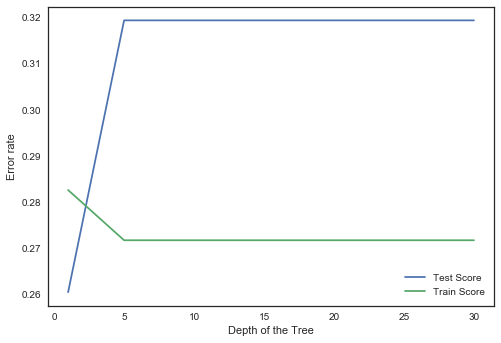

In [27]:
# Decision Trees

depths = [1, 5, 10, 15, 20, 22, 24, 26, 28, 30]
error_test = []
error_train = []

for i in range(0, len(depths)):
    dtree = DecisionTreeClassifier(max_depth = depths[i], min_samples_split = 50, min_samples_leaf = 20)#, random_state = 245) # minimum 50 samples required to split the node
    dtree = dtree.fit(X_train, y_train)
    
    error_test.append(zero_one_loss(y_test, dtree.predict(X_test)))
    error_train.append(zero_one_loss(y_train, dtree.predict(X_train)))

plt.plot(depths, error_test)
plt.plot(depths, error_train)

plt.xlabel('Depth of the Tree')
plt.ylabel('Error rate')
plt.legend(['Test Score', 'Train Score'])

In [28]:
dtree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50, min_samples_leaf = 20, random_state = 234)
dtree = dtree.fit(X_train, y_train)

tree.export_graphviz(dtree, out_file='dtree.dot')

# Due to issue in python anaconda environment, we used below command line to convert '.dot' file into .png image of the tree
# cmd line (wroking directory): dot -Tpng dtree.dot -o dtree.png

In [29]:
Image('dtree.png')

In [30]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, dtree.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, dtree.predict(X_test)), 2)))

f1 score for training dataset is 0.8
f1 score for testing dataset is 0.78


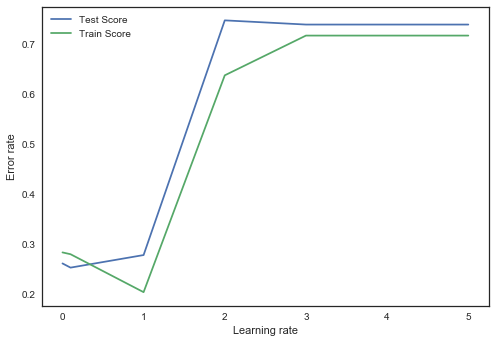

In [31]:
learning_rate = [0.001, 0.1, 1, 2, 3, 4, 5]
error_test = []
error_train = []

for i in range(0, len(learning_rate)):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = learning_rate[i])
    clf_ada = clf_ada.fit(X_train, y_train)
    
    error_test.append(zero_one_loss(y_test, clf_ada.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_ada.predict(X_train)))
    
    

sns.set(style="white")

plt.plot(learning_rate, error_test)
plt.plot(learning_rate, error_train)

plt.xlabel('Learning rate')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [32]:
clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = 1, random_state = 334)
clf_ada =  clf_ada.fit(X_train, y_train)

print('Error rate is {}%'.format(round(zero_one_loss(y_test, clf_ada.predict(X_test)), 2)))

Error rate is 0.28%


In [33]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, clf_ada.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, clf_ada.predict(X_test)), 2)))

f1 score for training dataset is 0.85
f1 score for testing dataset is 0.82


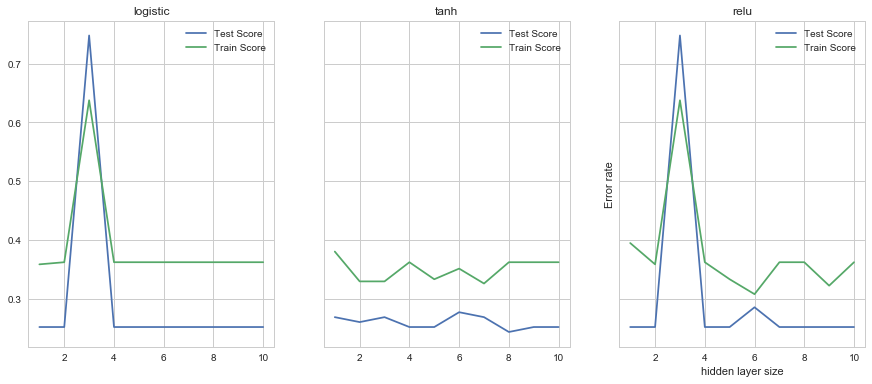

In [35]:
# Neural Networks

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=23832)
    
        mlp.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

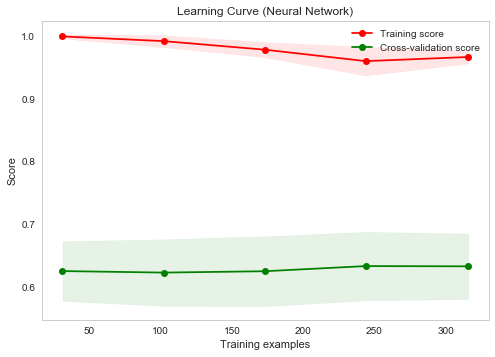

In [36]:
# Cross Validation

sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = X_lo, Y_lo


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23432)

estimator = MLPClassifier(hidden_layer_sizes=(10,5,5,3), activation = 'tanh', tol=1e-4, random_state=23832)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [37]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(10,5,5,3), activation = 'tanh', tol=1e-4, random_state=23832)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=23832,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Confusion matrix, without normalization
[[15 15]
 [26 63]]
Normalized confusion matrix
[[ 0.5   0.5 ]
 [ 0.29  0.71]]


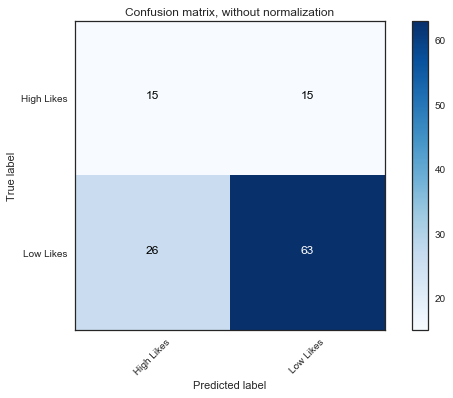

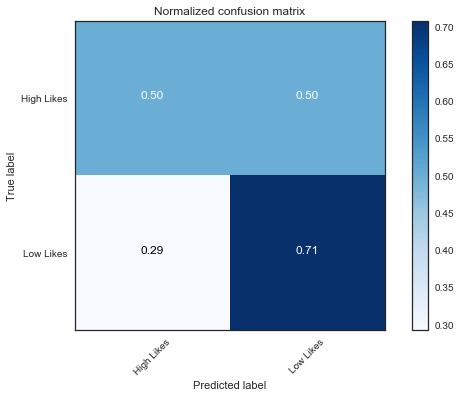

In [38]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, mlp.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, mlp.predict(X_test)), 2)))

f1 score for training dataset is 0.97
f1 score for testing dataset is 0.75


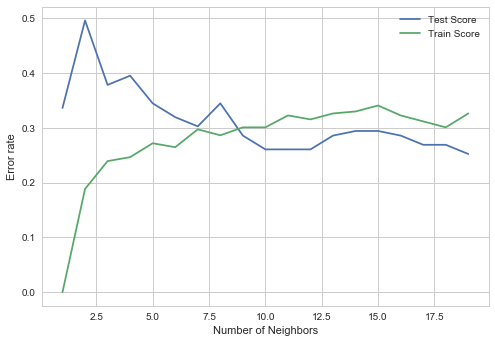

In [41]:
# K Nearest Neighbors

sns.set_style('whitegrid')
#fig, axs = plt.subplots(3,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

#axs = axs.ravel()

kvalue = range(1,20,1)
    
#for k in range(0, len(algo)):
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i])
    knn.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
    error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [42]:
knn = KNeighborsClassifier(n_neighbors= 10, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[ 8 22]
 [ 9 80]]
Normalized confusion matrix
[[ 0.27  0.73]
 [ 0.1   0.9 ]]


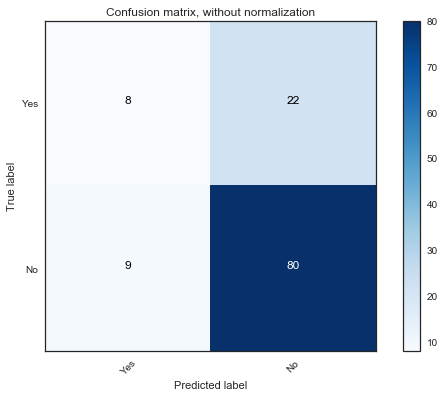

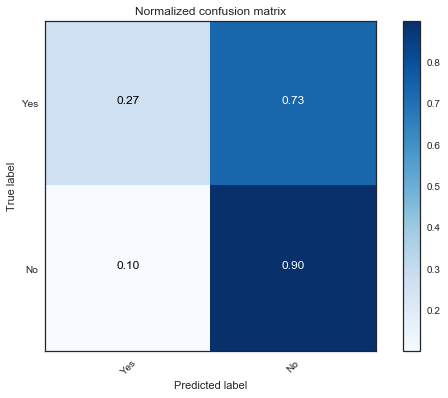

In [43]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [44]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, knn.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, knn.predict(X_test)), 2)))

f1 score for training dataset is 0.79
f1 score for testing dataset is 0.84


In [46]:
df1 = pd.read_csv('student-mat.csv', sep = ";")
df1.columns = df1.columns.str.strip()

In [47]:
df1['G3'] = np.where(df1['G3'] >= 10, 1, 0)

In [48]:
df1.groupby('G3').count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
G3,,,,,,,,,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
1,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265


In [49]:
df = df1.copy()
del df['G1']
del df['G2']
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,1


In [50]:
data = pd.get_dummies(data=df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])
data.head()
cols = list(data.columns.values)
col_names = ['age', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3',
 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2', 'failures_3', 'schoolsup_no', 'schoolsup_yes',
 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5', 'freetime_1',
 'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_1', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5', 'health_1', 'health_2', 'health_3', 'health_4', 'health_5', 'G3']
data = data[col_names]

In [51]:
df_X = data[['age', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3',
 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2', 'failures_3', 'schoolsup_no', 'schoolsup_yes',
 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5', 'freetime_1',
 'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_1', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5', 'health_1', 'health_2', 'health_3', 'health_4', 'health_5']]
df_y = data['G3']

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X.values,df_y.values,test_size=0.3, random_state = 7)

y_train = np.array(y_train).flatten()                                    
y_test = np.array(y_test).flatten()                                      

In [52]:
import collections
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({1: 177, 0: 99})
Counter({1: 88, 0: 31})


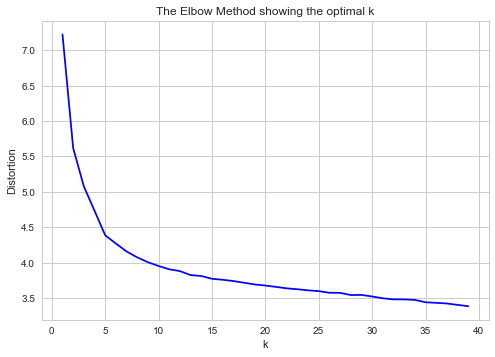

In [53]:
# K-Means, determining optimum k

distortions = []
K = range(1,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow from the above plot is not clear. Hence we will go with the number which has least slope after that point.
6 clusters seems to be a good choice. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
The best value is 1 and the worst value is -1

('For n_clusters =', 6, 'The average silhouette_score is :', 0.15932088169338404)


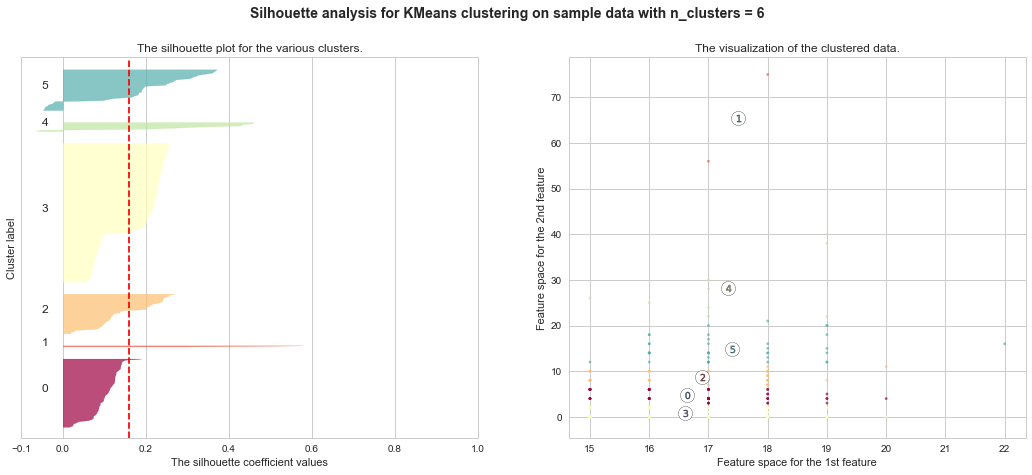

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sns.set(style="whitegrid")

def plot_cluster(n_clusters, X):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=6)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

plot_cluster(6, X_train)

The value is 0.16 which is near 0, that means overlapping clusters. Same can be seen from the above plot.

In [55]:
# Traing k-means
kmeans = KMeans(n_clusters = 6, random_state=7)
kmeans.fit(X_train, y_train)

y_pred_kmeans_train = kmeans.predict(X_train)
y_pred_kmeans_test = kmeans.predict(X_test)

# Expectation Maximization using Gaussian Mixtures

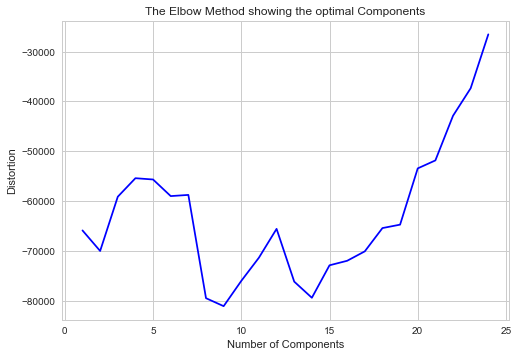

In [56]:
aic = []
K = range(1,25)
for k in K:
    gmm = mixture.GaussianMixture(n_components = k).fit(X_train)
    gmm.fit(X_train)
    aic.append(gmm.aic(X_train))

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, aic, 'bx-')
plt.xlabel('Number of Components')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal Components')
plt.show()

Distortion is the value of AIC.
Elbow can be seen at 6 components. Hence we will use 6 components to train gaussian mixture model which uses expectation maximization algorithm.

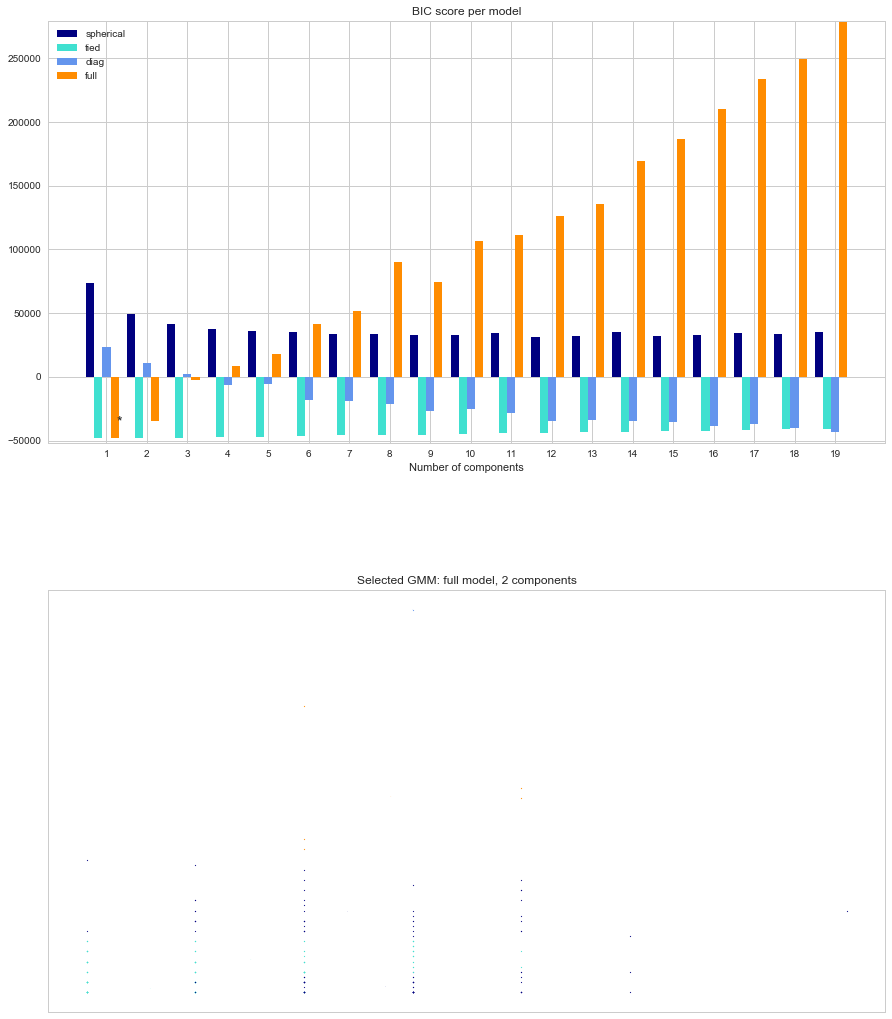

In [57]:
from scipy import linalg
import matplotlib as mpl

def EM_BIC(X, spl):
    C = np.array([[0., -0.1], [1.7, .4]])
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)


def EM_win(X, splot, clf):
    # Plot the winner
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

X = X_train
np.random.seed(7)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(X)
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

Above graph also indicate that optimal no. of components is 6. Although clusters don't seem to be well seperated.

In [58]:
# Traing EM
gmm = mixture.GaussianMixture(n_components = 6, random_state=7)
gmm.fit(X_train, y_train)

y_pred_gmm_train = gmm.predict(X_train)
y_pred_gmm_test = gmm.predict(X_test)

# Comparison

# Feature Selection & Dimensionality Reduction

# Feature selection based on decision tree

In [59]:
cols = df.shape[1]                                                         #Number of columns

X = data[['age', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu_0', 'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3',
 'Fedu_4', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime_1', 'traveltime_2', 'traveltime_3', 'traveltime_4', 'studytime_1', 'studytime_2', 'studytime_3', 'studytime_4', 'failures_0', 'failures_1', 'failures_2', 'failures_3', 'schoolsup_no', 'schoolsup_yes',
 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'famrel_1', 'famrel_2', 'famrel_3', 'famrel_4', 'famrel_5', 'freetime_1',
 'freetime_2', 'freetime_3', 'freetime_4', 'freetime_5', 'goout_1', 'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_1', 'Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_1', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5', 'health_1', 'health_2', 'health_3', 'health_4', 'health_5']]
y = data['G3']

X = np.c_[X, np.square(X)]                             # Adding new features which are square of existing one's

clf =  DecisionTreeClassifier(max_depth=5, random_state = 7)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
print(X.shape)

(395L, 19L)
(395L, 194L)


In [61]:
df_X = X_new                                                      #Filter independent variables
df_y = y

In [62]:
#Train and test splits
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(df_X,df_y,test_size=0.3, random_state = 7)

## We will classify anything more than 3rd quartile as high shares##
#y_train = np.where(y_train > np.median(y_train), 1, 0)                   #For logistic regression
#y_test = np.where(y_test > np.median(y_train), 1, 0)                     #For logistic regression

y_train_dt = np.array(y_train).flatten()                                    #For linear regression
y_test_dt = np.array(y_test).flatten()                                      #For linear regression

# Principal Component Analysis

[<matplotlib.text.Text at 0xf66d748>, <matplotlib.text.Text at 0xeb0a630>]

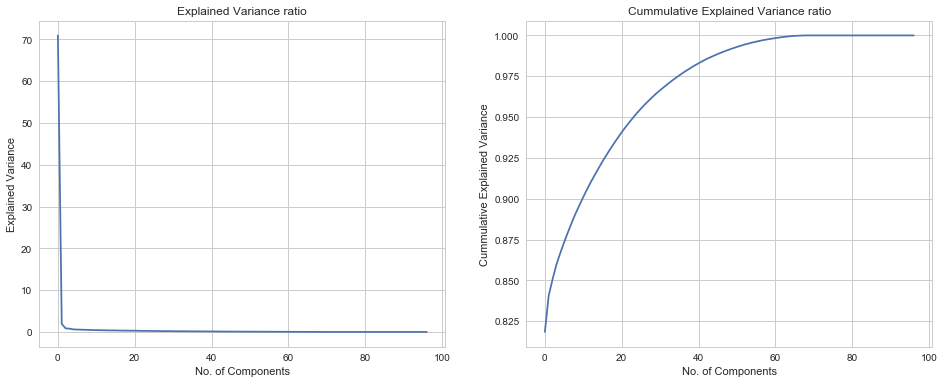

In [63]:
pca = PCA(random_state = 7)
pca.fit(X_train)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# PCA plot
ax[0].plot(pca.explained_variance_)
ax[0].set_title('Explained Variance ratio')
ax[0].set(xlabel='No. of Components', ylabel='Explained Variance')

# Cummulative variance explained
ax[1].plot(np.cumsum(pca.explained_variance_ratio_))
ax[1].set_title('Cummulative Explained Variance ratio')
ax[1].set(xlabel='No. of Components', ylabel='Cummulative Explained Variance')

In [64]:
pca = PCA(n_components = 4, random_state = 7)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.fit_transform(X_test, y_test)

# Independent Component Analysis

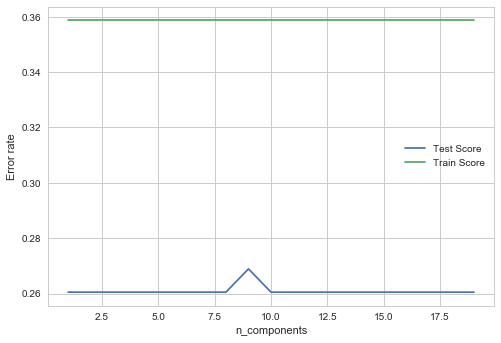

In [65]:
n_components = range(1,20,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ica = FastICA(n_components = n_components[i], whiten = True, random_state=7)
    X_train_ica = ica.fit_transform(X_train, y_train)
    X_test_ica = ica.fit_transform(X_test, y_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ica, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ica)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ica)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [66]:
ica = FastICA(n_components = 3, whiten = True, random_state = 7)
X_train_ica = ica.fit_transform(X_train, y_train)
X_test_ica = ica.fit_transform(X_test, y_test)

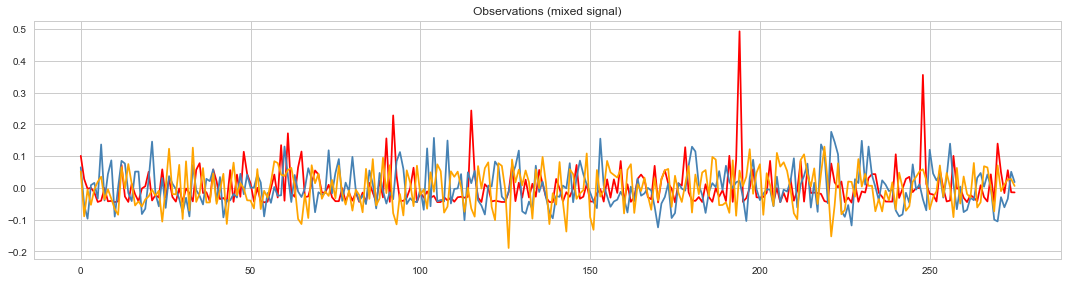

In [67]:
# Compute ICA
S_ = ica.fit_transform(X_train)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plt.figure(figsize = (15, 15))

models = [S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange', 'purple', 'grey', 'skyblue', 'black', 'pink', 'green', 'lightgreen']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

# Randomized Projections

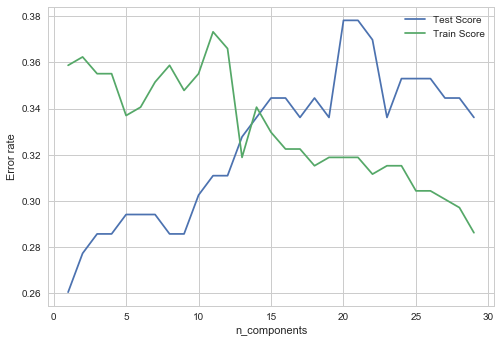

In [68]:
n_components = range(1,30,1)
error_test = []
error_train = []

for i in range(0, len(n_components)):
    ra = random_projection.GaussianRandomProjection(n_components = n_components[i], random_state=7)
    X_train_ra = ra.fit_transform(X_train)
    X_test_ra = ra.fit_transform(X_test, y_test)

    logreg = linear_model.LogisticRegression()
    logreg.fit(X_train_ra, y_train)
    
    error_test.append(zero_one_loss(y_test, logreg.predict(X_test_ra)))
    error_train.append(zero_one_loss(y_train, logreg.predict(X_train_ra)))


sns.set(style="whitegrid")


plt.plot(n_components, error_test)
plt.plot(n_components, error_train)
plt.xlabel('n_components')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

In [69]:
ra = random_projection.GaussianRandomProjection(n_components = 3, random_state = 7)
ra.fit(X_train)
X_train_ra = ra.fit_transform(X_train)
X_test_ra = ra.fit_transform(X_test, y_test)

# Clustering post Dimentionality Reduction

# K-Means

## Using Decision Tree Results

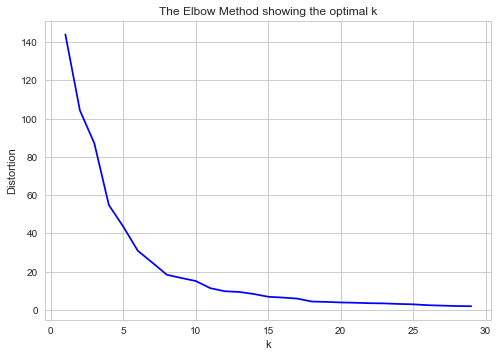

In [70]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_dt)
    kmeanModel.fit(X_train_dt)
    distortions.append(sum(np.min(cdist(X_train_dt, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_dt.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Using PCA Results

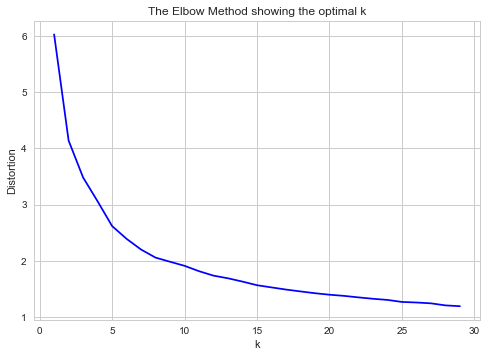

In [71]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    distortions.append(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Using ICA Results

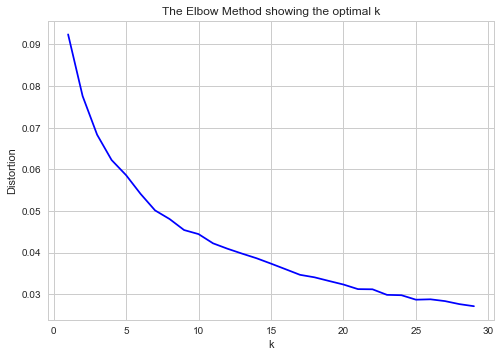

In [72]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_ica)
    kmeanModel.fit(X_train_ica)
    distortions.append(sum(np.min(cdist(X_train_ica, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_ica.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Using Random Projections Reuslts

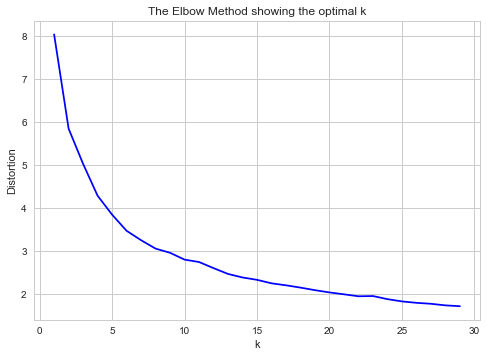

In [73]:
# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_ra)
    kmeanModel.fit(X_train_ra)
    distortions.append(sum(np.min(cdist(X_train_ra, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_ra.shape[0])

# Plot the elbow
sns.set(style="whitegrid")

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Comparison:

('For n_clusters =', 8, 'The average silhouette_score is :', 0.72373185255594674)


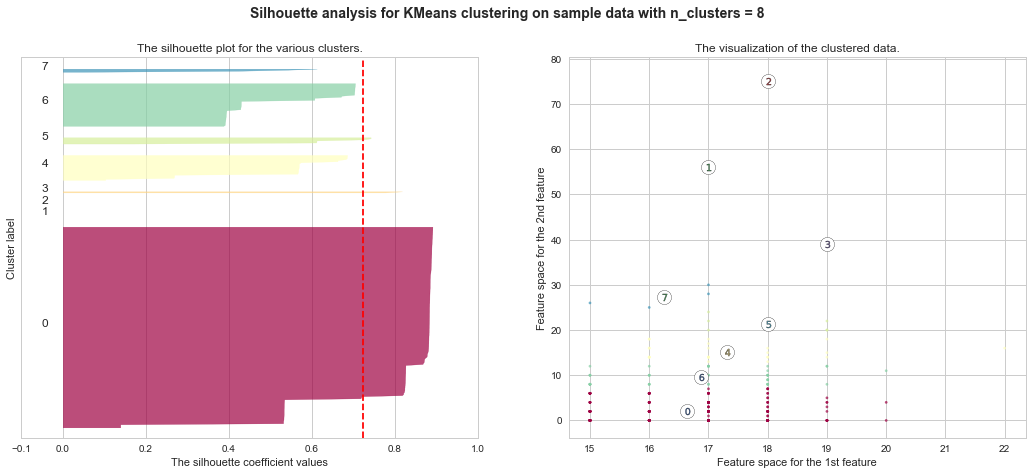

In [74]:
# Using DT results
plot_cluster(8, X_train_dt)

('For n_clusters =', 7, 'The average silhouette_score is :', 0.36264598186892044)


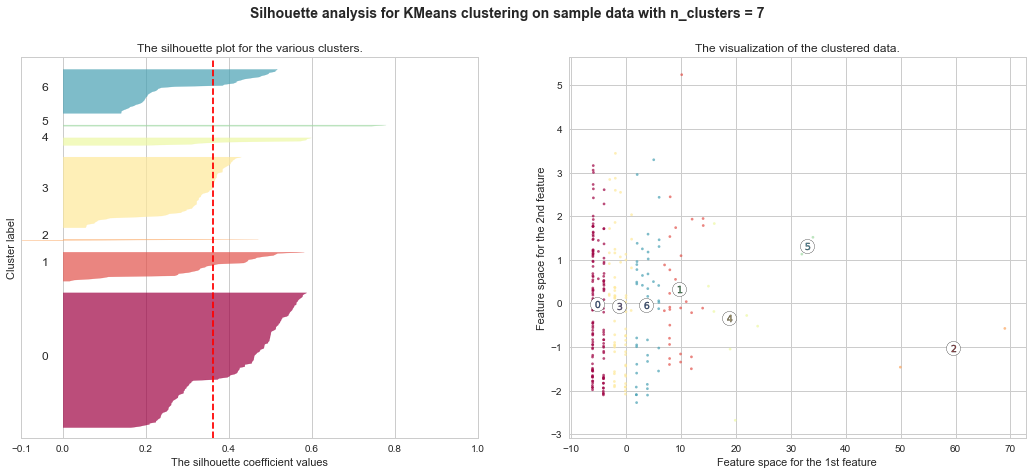

In [75]:
# Using PCA results
plot_cluster(7, X_train_pca)

('For n_clusters =', 8, 'The average silhouette_score is :', 0.3000981982262102)


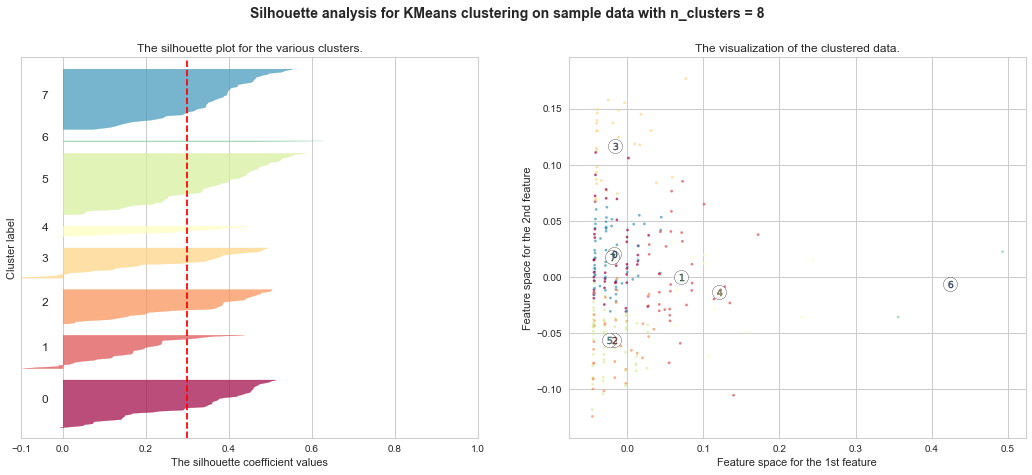

In [76]:
# Using ICA results
plot_cluster(8, X_train_ica)

('For n_clusters =', 8, 'The average silhouette_score is :', 0.28252377798833417)


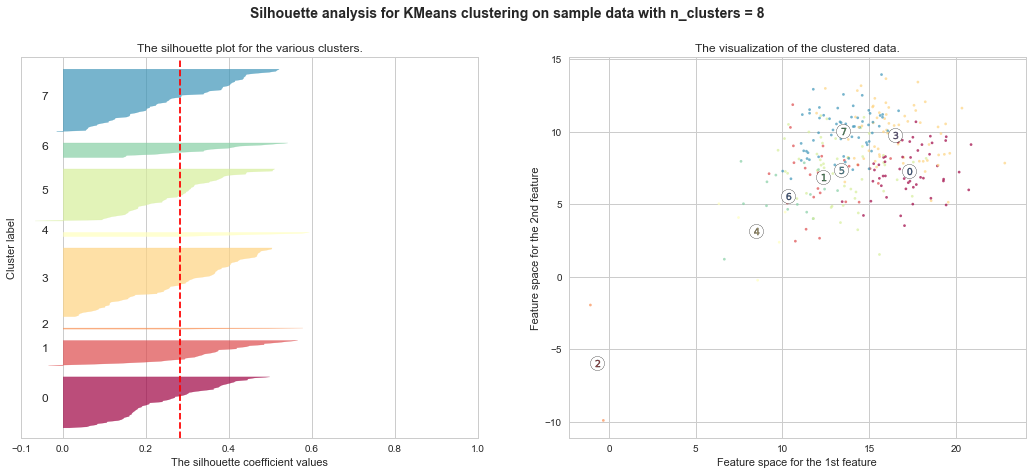

In [77]:
# Using RP results
plot_cluster(8, X_train_ra)

# Expectation Maximization

## Using DT Results

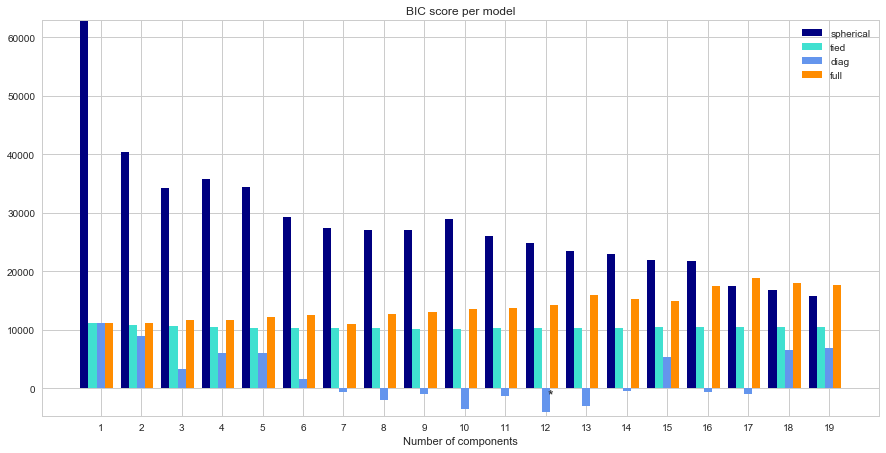

In [78]:
X = X_train_dt
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

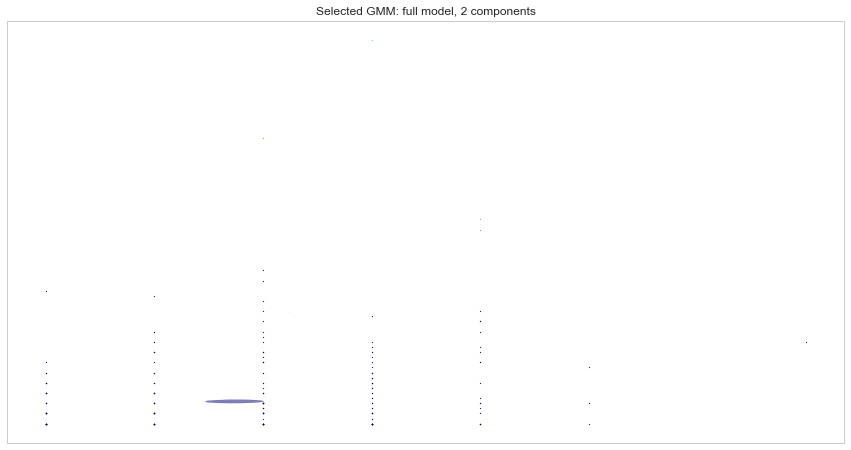

In [79]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

## Using PCA Results

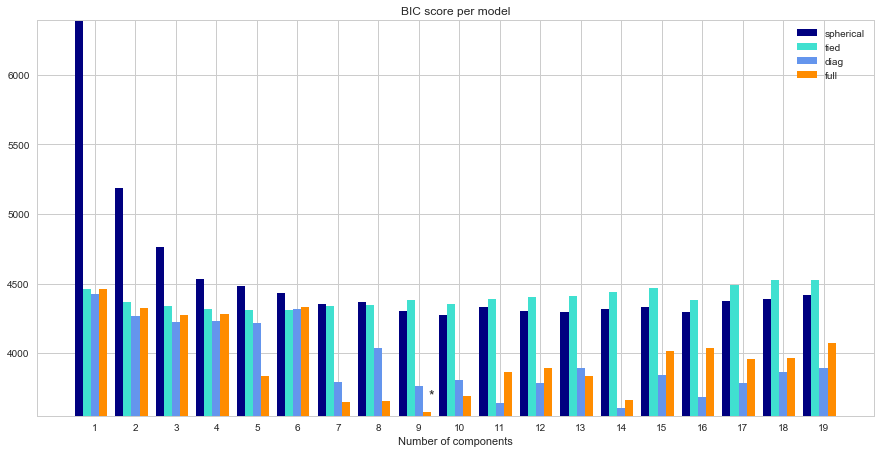

In [80]:
X = X_train_pca
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

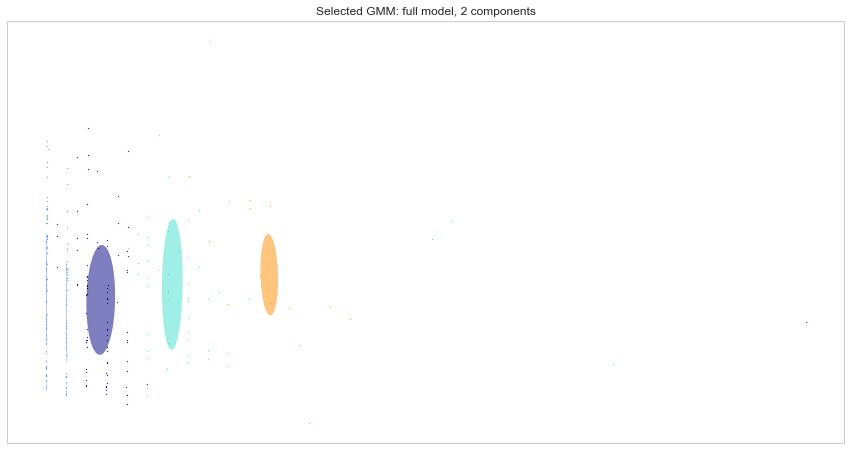

In [81]:
clf = mixture.GaussianMixture(n_components=7, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

## Using ICA Results

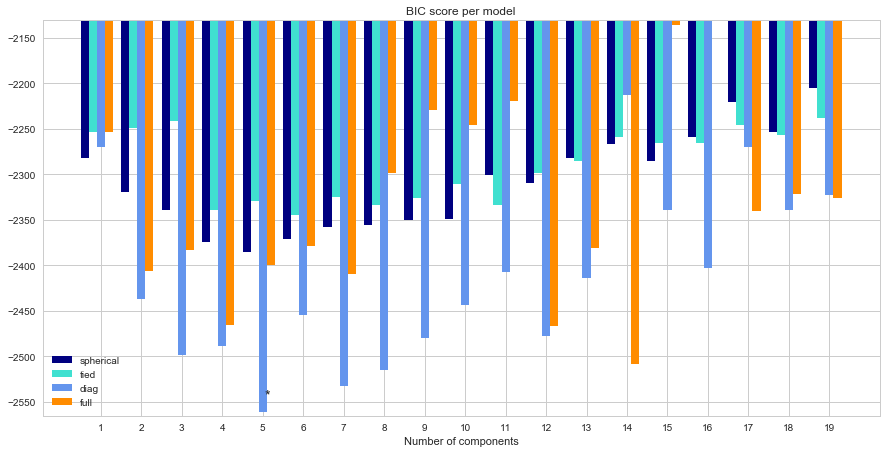

In [82]:
X = X_train_ica
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

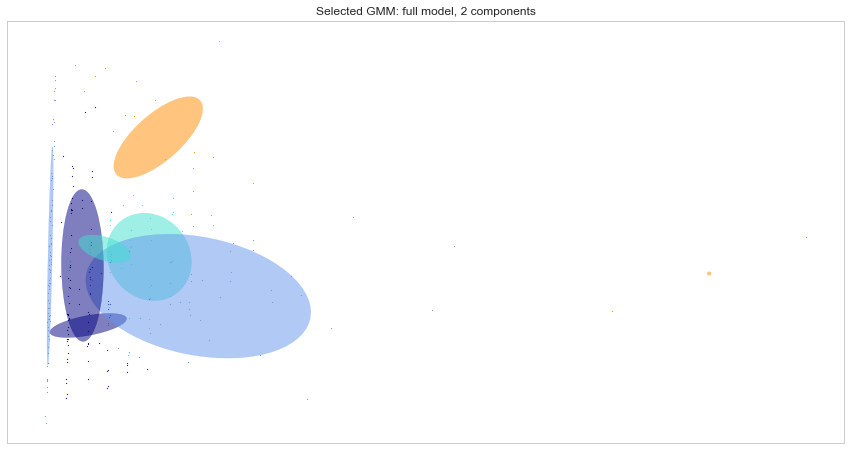

In [83]:
clf = mixture.GaussianMixture(n_components=8, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

## Using Random Projections Results

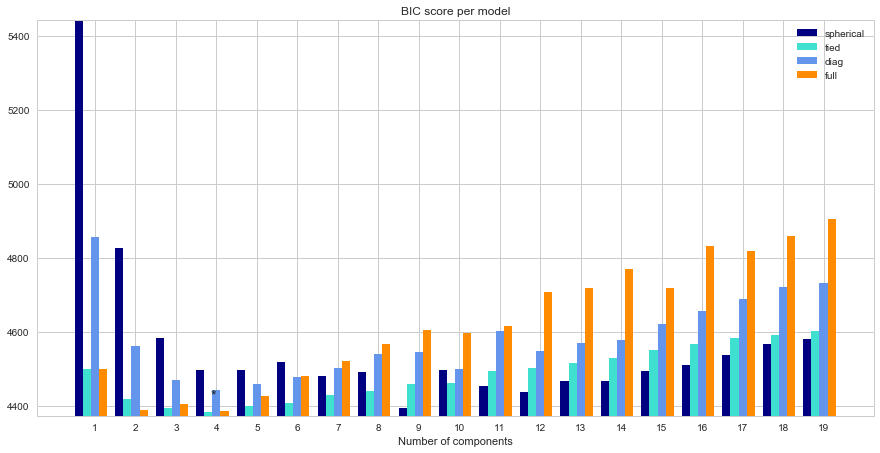

In [84]:
X = X_train_ra
np.random.seed(0)
plt.figure(figsize = (15,16))
spl = plt.subplot(2, 1, 1)
EM_BIC(X,spl)

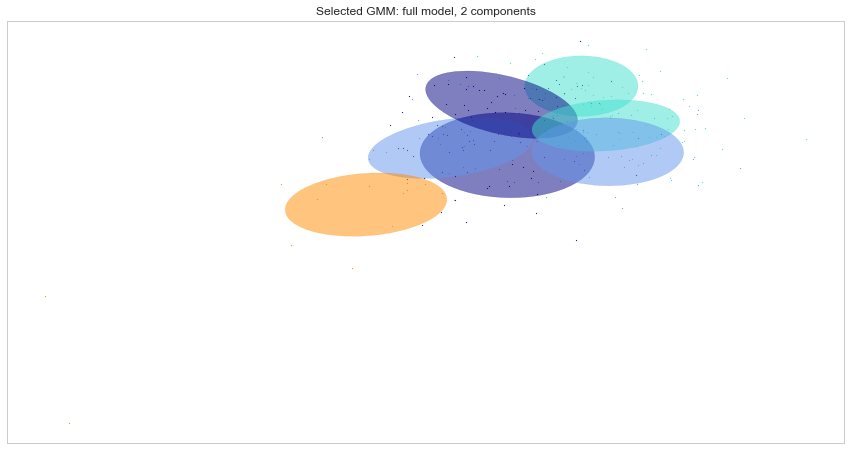

In [85]:
clf = mixture.GaussianMixture(n_components=8, covariance_type='full')
clf.fit(X)
plt.figure(figsize = (15,16))
splot = plt.subplot(2, 1, 2)
EM_win(X, splot, clf)

# Neural Netwroks after Dimensionality Reduction

## Using results from DT

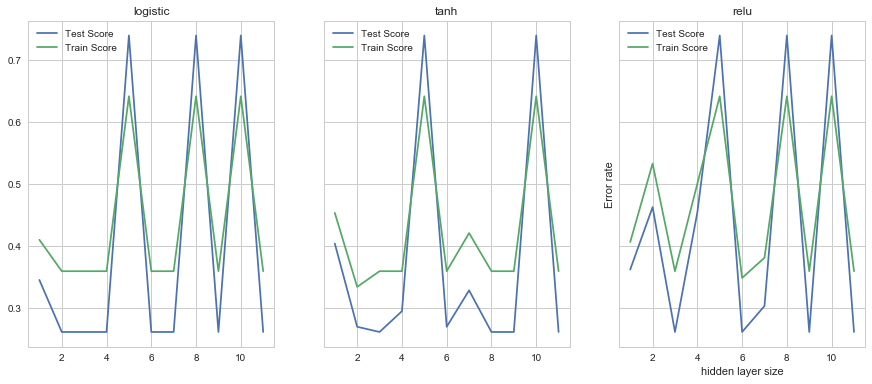

In [86]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]

activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_dt, y_train_dt)

        error_test.append(zero_one_loss(y_test_dt, mlp.predict(X_test_dt)))
        error_train.append(zero_one_loss(y_train_dt, mlp.predict(X_train_dt)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10, 11], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10, 11], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [87]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_dt, y_train_dt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[19 12]
 [42 46]]


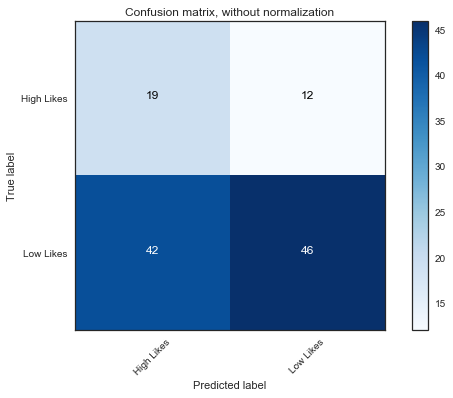

In [88]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test_dt)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_dt, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Using Results from PCA

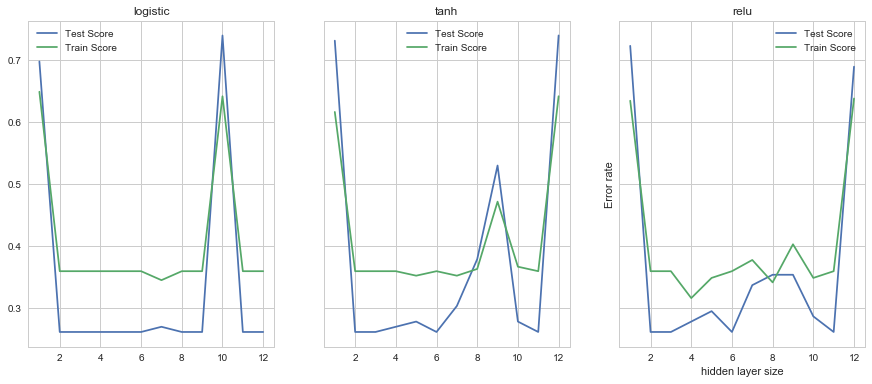

In [89]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_pca, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_pca)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_pca)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [90]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_pca, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[ 6 25]
 [16 72]]


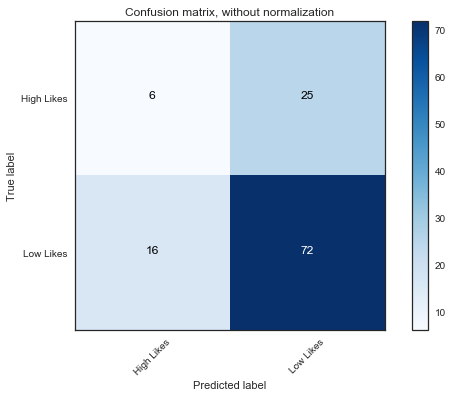

In [91]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test_pca)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Using Results from ICA

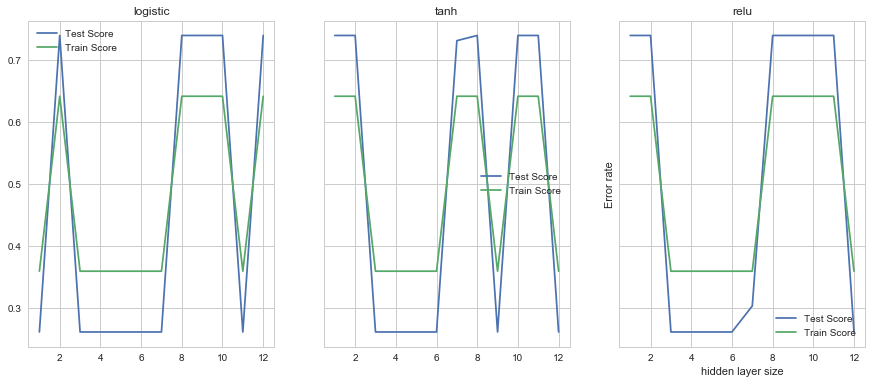

In [92]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_ica, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_ica)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_ica)))

 
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [93]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_ica, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[ 0 31]
 [ 0 88]]


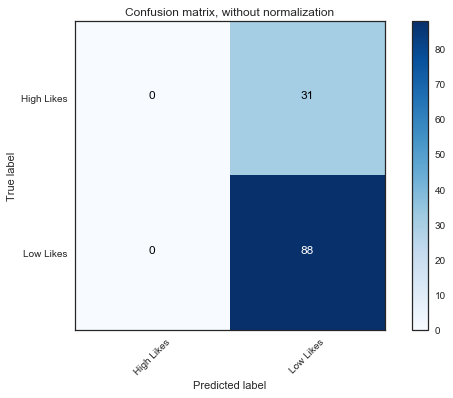

In [94]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test_ica)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Using Results from Random Projections

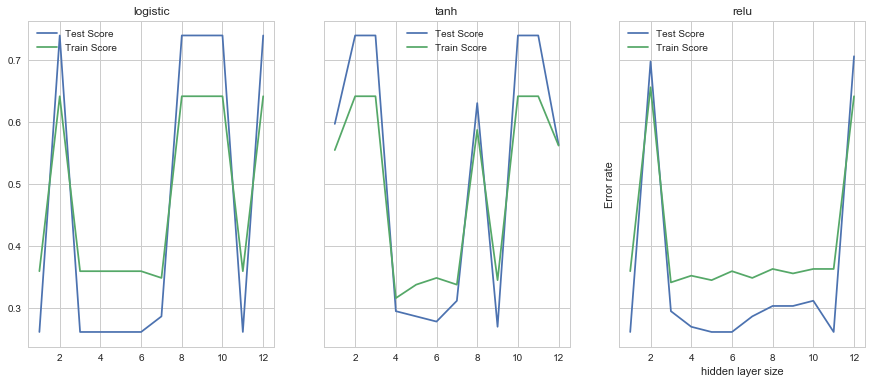

In [95]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(X_train_ra, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test_ra)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train_ra)))

    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [96]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15), activation = 'relu', tol=1e-4, random_state = 7)
mlp.fit(X_train_ra, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[ 2 29]
 [ 8 80]]


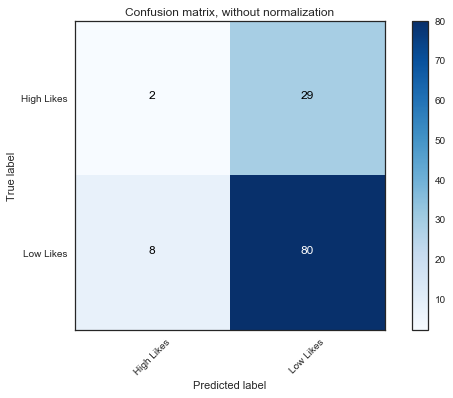

In [97]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test_ra)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

# Neural Network Using Clusters of Task 1

## Using K means clusters

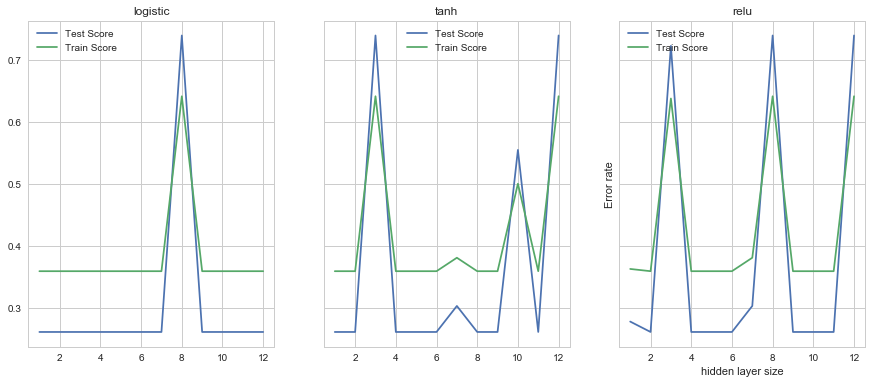

In [98]:
y_pred_kmeans_train = y_pred_kmeans_train.reshape(-1,1)
y_pred_kmeans_test = y_pred_kmeans_test.reshape(-1,1)

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(y_pred_kmeans_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(y_pred_kmeans_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(y_pred_kmeans_train)))

      
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [99]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'tanh', tol=1e-4, random_state = 7)
mlp.fit(y_pred_kmeans_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[ 0 31]
 [ 0 88]]


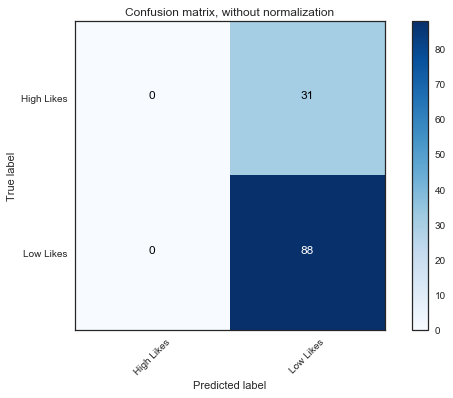

In [100]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(y_pred_kmeans_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Using Expectation Maximization Clusters

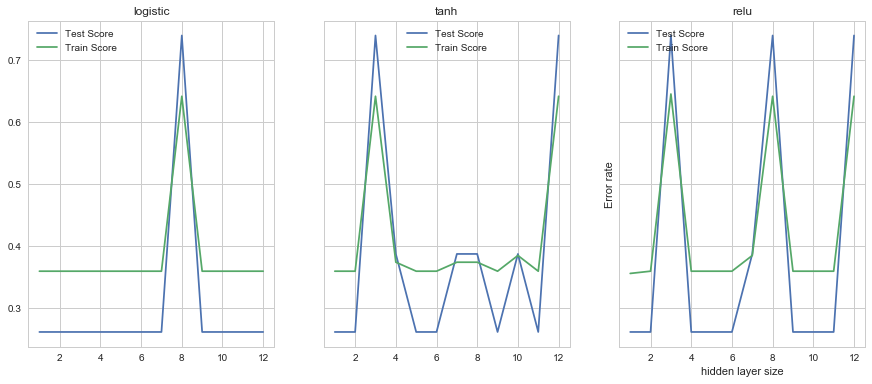

In [101]:
y_pred_gmm_train = y_pred_gmm_train.reshape(-1,1)
y_pred_gmm_test = y_pred_gmm_test.reshape(-1,1)

sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (35,25,15), (35,25,15,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state = 7)
    
        mlp.fit(y_pred_gmm_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(y_pred_gmm_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(y_pred_gmm_train)))

      
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10,11,12], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")

In [102]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(35,25,15,5), activation = 'tanh', tol=1e-4, random_state = 7)
mlp.fit(y_pred_gmm_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 25, 15, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Confusion matrix, without normalization
[[ 0 31]
 [ 0 88]]


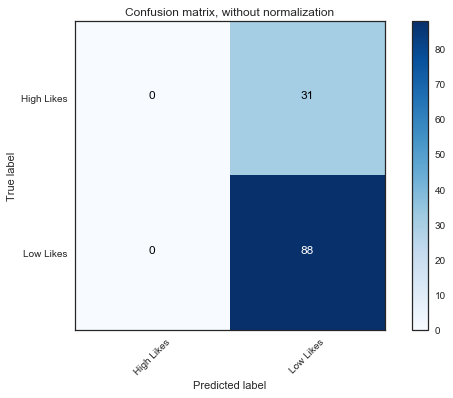

In [104]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(y_pred_gmm_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

# Discussion

### Comparison whithin Neural Networks Using only Clusters as Input

### Comparison whithin Neural Networks Using only Reduced Dimension as Input